#**Salary Problem**

In [2]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1) (1).csv


In [159]:
train=pd.read_csv('SalaryData_Train(1).csv')

In [5]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1) (1).csv


In [160]:
test= pd.read_csv('SalaryData_Test(1).csv')

In [161]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [162]:
train.duplicated().sum()

3258

In [163]:
train=train.drop_duplicates()

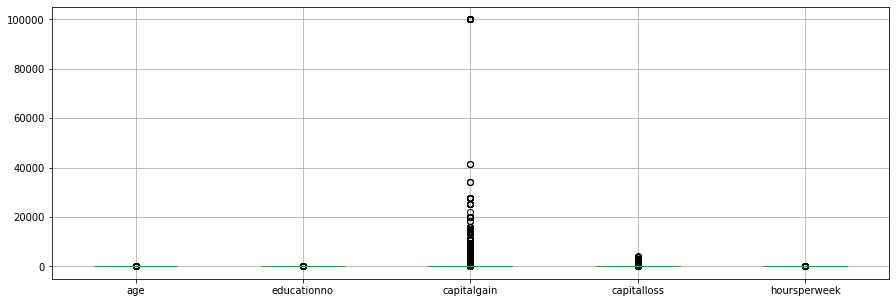

In [164]:
train.boxplot(figsize=(15,5))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde19dd6df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde19de64f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde19dd6a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde19de6bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde19de6eb0>],
 'means': []}

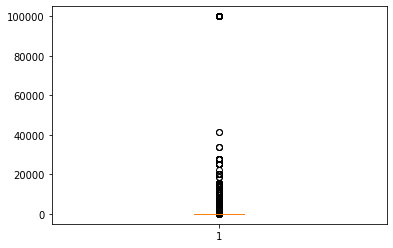

In [165]:
plt.boxplot(train['capitalgain'])

In [166]:
train['capitalgain'].value_counts()

0        24379
15024      331
7688       266
7298       238
99999      147
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capitalgain, Length: 118, dtype: int64

In [167]:
train=train.drop('capitalgain',axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde19d36280>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde19d36940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde19daaee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde19d40040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde19d40340>],
 'means': []}

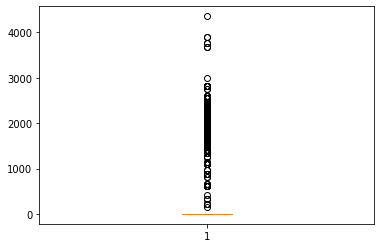

In [168]:
plt.boxplot(train['capitalloss'])

In [169]:
train=train.drop(train[train['capitalloss']>2100].index,axis=0)

In [170]:
train=train.drop(train[train['capitalloss']<1800].index,axis=0)

In [171]:
train.shape

(721, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde19d10610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde19d10cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde19d102b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde19d183d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde19d186d0>],
 'means': []}

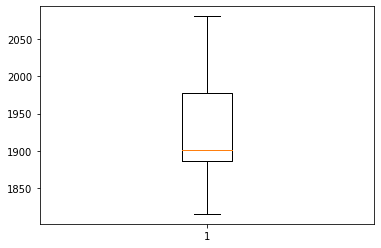

In [172]:
plt.boxplot(train['capitalloss'])

In [173]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalloss,hoursperweek,native,Salary
22,43,Private,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,2042,40,United-States,<=50K
48,47,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,1902,60,Honduras,>50K
88,48,Self-emp-not-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,1902,60,United-States,>50K
103,56,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,1887,50,Canada,>50K
145,71,Self-emp-not-inc,Some-college,10,Separated,Sales,Unmarried,Black,Male,1816,2,United-States,<=50K


In [174]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [175]:
label_encoder=preprocessing.LabelEncoder()
train['workclass']=label_encoder.fit_transform(train['workclass'])
train['maritalstatus']=label_encoder.fit_transform(train['maritalstatus'])
train['occupation']=label_encoder.fit_transform(train['occupation'])
train['relationship']=label_encoder.fit_transform(train['relationship'])
train['race']=label_encoder.fit_transform(train['race'])
train['sex']=label_encoder.fit_transform(train['sex'])
train['native']=label_encoder.fit_transform(train['native'])
train['Salary']=label_encoder.fit_transform(train['Salary'])

In [176]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalloss,hoursperweek,native,Salary
22,43,2,11th,7,1,12,0,4,1,2042,40,23,0
48,47,2,Prof-school,15,1,8,5,4,0,1902,60,7,1
88,48,4,Doctorate,16,1,8,0,4,1,1902,60,23,1
103,56,4,HS-grad,9,1,7,0,4,1,1887,50,1,1
145,71,4,Some-college,10,4,10,4,2,1,1816,2,23,0


In [177]:
train['Salary'].value_counts()

1    546
0    175
Name: Salary, dtype: int64

In [178]:
train=train.drop(['education'],axis=1)

In [179]:
train.shape

(721, 12)

test

In [180]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [181]:
test.shape

(15060, 14)

In [182]:
test.duplicated().sum()

930

In [183]:
test=test.drop_duplicates()

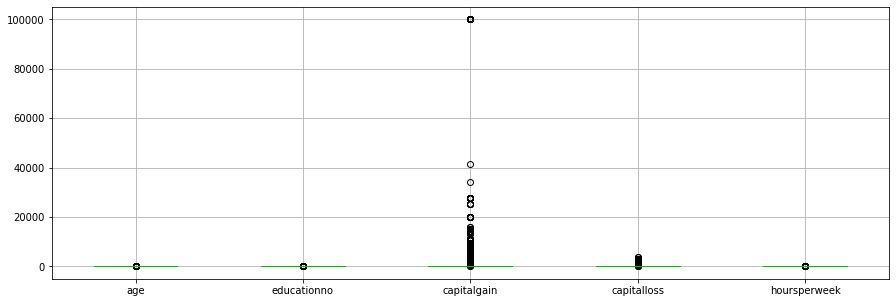

In [184]:
test.boxplot(figsize=(15,5))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde19c10850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde19c10f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde19c104f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde19c1c610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde19c1c910>],
 'means': []}

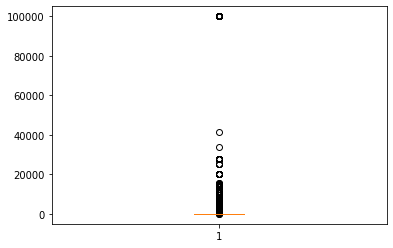

In [185]:
plt.boxplot(test['capitalgain'])

In [186]:
test['capitalgain'].value_counts()

0        12881
15024      161
7688       120
7298       110
99999       80
         ...  
2329         1
3273         1
2346         1
34095        1
2036         1
Name: capitalgain, Length: 110, dtype: int64

In [187]:
test=test.drop('capitalgain',axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde19bef460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde19befb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde19bef100>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde19b79220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde19b79520>],
 'means': []}

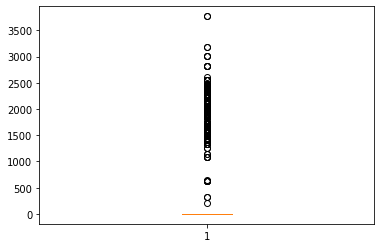

In [188]:
plt.boxplot(test['capitalloss'])

In [189]:
test=test.drop(test[test['capitalloss']<1800].index,axis=0)

In [190]:
test=test.drop(test[test['capitalloss']>2000].index,axis=0)

In [191]:
test.shape

(317, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde19b4b5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde19b4bc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde19b4b250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde19b54370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde19b54670>],
 'means': []}

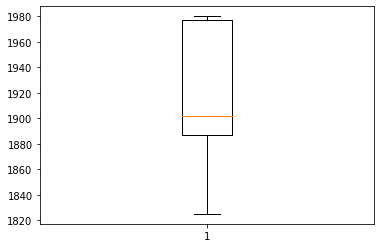

In [192]:
plt.boxplot(test['capitalloss'])

In [193]:
label_encoder=preprocessing.LabelEncoder()
test['workclass']=label_encoder.fit_transform(test['workclass'])
test['maritalstatus']=label_encoder.fit_transform(test['maritalstatus'])
test['occupation']=label_encoder.fit_transform(test['occupation'])
test['relationship']=label_encoder.fit_transform(test['relationship'])
test['race']=label_encoder.fit_transform(test['race'])
test['sex']=label_encoder.fit_transform(test['sex'])
test['native']=label_encoder.fit_transform(test['native'])
test['Salary']=label_encoder.fit_transform(test['Salary'])

In [194]:
test=test.drop(['education'],axis=1)

In [195]:
test.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalloss,hoursperweek,native,Salary
74,24,2,10,3,6,1,4,1,1876,40,17,0
130,43,3,9,1,2,0,4,1,1887,45,17,1
141,40,5,13,1,0,0,4,1,1887,45,17,1
157,54,2,9,1,7,0,4,1,1887,40,17,1
166,37,2,10,1,5,0,4,1,1887,40,17,1


In [196]:
x=train.iloc[:,:-1]
y=train['Salary']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [198]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((504, 11), (504,), (217, 11), (217,))

In [199]:
clf = SVC()
param_grid = [{'kernel':['linear','relu'],'gamma':[0.5,0.1],'C':[10,0.1] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=300)
gsv.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10; 1/8] START C=10, gamma=0.5, kernel=linear.............................
[CV 1/10; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.863 total time=   2.6s
[CV 2/10; 1/8] START C=10, gamma=0.5, kernel=linear.............................
[CV 2/10; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.922 total time=   2.9s
[CV 3/10; 1/8] START C=10, gamma=0.5, kernel=linear.............................
[CV 3/10; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.863 total time=   6.7s
[CV 4/10; 1/8] START C=10, gamma=0.5, kernel=linear.............................
[CV 4/10; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.941 total time=   3.0s
[CV 5/10; 1/8] START C=10, gamma=0.5, kernel=linear.............................
[CV 5/10; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.880 total time=   2.2s
[CV 6/10; 1/8] START C=10, gamma=0.5, kernel=linear.............................
[CV 6/10; 1/8] END C=10, gamma=0.5, ke

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 173, in sk

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1], 'gamma': [0.5, 0.1],
                                         'kernel': ['linear', 'relu']}],
                   verbose=300)

In [200]:
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'linear', 'gamma': 0.5, 'C': 10}, 0.9068235294117646)

In [201]:
clf = SVC(kernel='linear',C=10)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 91.70506912442397


array([[ 36,  16],
       [  2, 163]])

prediction

In [202]:
U=test.iloc[:,0:-1]
V=test['Salary']

In [203]:
y_newpred = clf.predict(U)
newacc = accuracy_score(V, y_newpred) * 100
print("Accuracy =", newacc)
confusion_matrix(V, y_newpred)

Accuracy = 88.64353312302839


array([[ 18,  33],
       [  3, 263]])

#**Forest Fire Problem**

In [204]:
import pandas as pd
from sklearn import preprocessing

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [205]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires (1).csv


In [272]:
frst=pd.read_csv('forestfires.csv')

In [273]:
frst.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [274]:
frst.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [275]:
frst.duplicated().sum()

8

In [276]:
frst=frst.drop_duplicates()

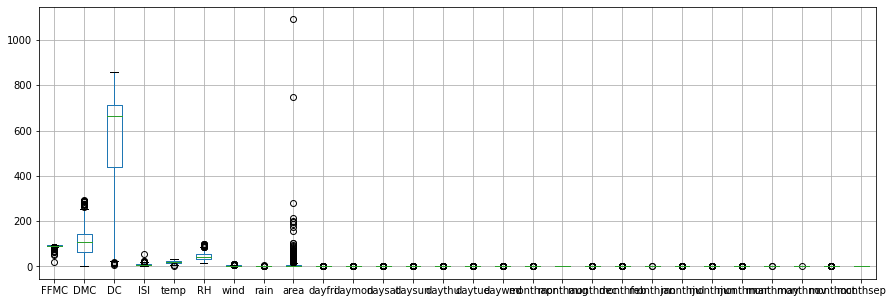

In [277]:
frst.boxplot(figsize=(15,5))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde18bf88e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde18bf8fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde18bf8580>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde18c036a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde18c039a0>],
 'means': []}

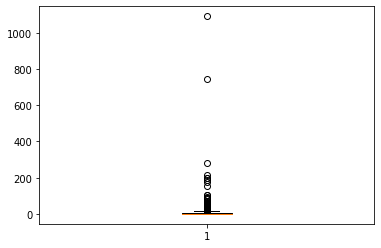

In [278]:
plt.boxplot(frst['area'])

In [279]:
frst=frst.drop(frst[frst['area']>200].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde18bcd220>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde18bcd8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde18bc0e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde18bcdfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde18bd72e0>],
 'means': []}

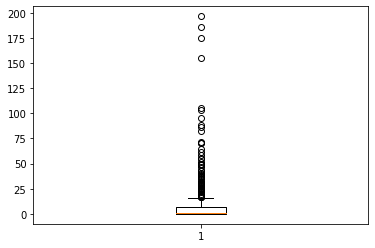

In [280]:
plt.boxplot(frst['area'])

In [281]:
frst=frst.drop(['month','day'],axis=1)

In [282]:
label_encoder=preprocessing.LabelEncoder()
frst['size_category']=label_encoder.fit_transform(frst['size_category'])

In [283]:
frst.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [284]:
frst['size_category'].value_counts()

1    371
0    133
Name: size_category, dtype: int64

In [285]:
frst.shape

(504, 29)

In [286]:
X=frst.iloc[:,0:28]
Y=frst.iloc[:,28]

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [288]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((352, 28), (352,), (152, 28), (152,))

In [289]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=300)
gsv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=10, gamma=0.01, kernel=rbf..............................
[CV 1/10; 1/10] END C=10, gamma=0.01, kernel=rbf;, score=0.694 total time=   0.0s
[CV 2/10; 1/10] START C=10, gamma=0.01, kernel=rbf..............................
[CV 2/10; 1/10] END C=10, gamma=0.01, kernel=rbf;, score=0.722 total time=   0.0s
[CV 3/10; 1/10] START C=10, gamma=0.01, kernel=rbf..............................
[CV 3/10; 1/10] END C=10, gamma=0.01, kernel=rbf;, score=0.743 total time=   0.0s
[CV 4/10; 1/10] START C=10, gamma=0.01, kernel=rbf..............................
[CV 4/10; 1/10] END C=10, gamma=0.01, kernel=rbf;, score=0.743 total time=   0.0s
[CV 5/10; 1/10] START C=10, gamma=0.01, kernel=rbf..............................
[CV 5/10; 1/10] END C=10, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 6/10; 1/10] START C=10, gamma=0.01, kernel=rbf..............................
[CV 6/10; 1/10] END C=10, gamma=0.01, ker

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=300)

In [290]:
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'linear', 'gamma': 0.1, 'C': 10}, 0.9800793650793651)

In [291]:
clf = SVC(kernel='linear',C=10)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 94.73684210526315


array([[ 35,   7],
       [  1, 109]])